# Dampak Fluktasi Kurs Rupiah Terhadap Indeks Harga Perdagangan Besar dan peramalannya menggunakan metode ARIMA

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
plt.style.use('seaborn-poster')

Bulan = pd.read_csv('data_bongkar_muat_index_harga_sektor_industri.csv', header=0, squeeze=True, usecols=['Bulan'])
DataIndustri = pd.read_csv('data_bongkar_muat_index_harga_sektor_industri.csv', header=0, squeeze=True, usecols=['IHPB Industri'])
DataImport = pd.read_csv('dataimex.csv',header=0,squeeze=True,usecols=['Import'])
DataExport = pd.read_csv('dataimex.csv',header=0,squeeze=True,usecols=['Export'])
DataKurs = pd.read_csv('datakurs.csv',header=0,squeeze=True,usecols=['Kurs'])
Tahun = [2006];
for x in range(14):
    Tahun.append(Tahun[x]+1)

In [2]:
def tahun(rng):
    return (rng-2006)*12

def mymean(data):
    meanout = []
    for x in range(2020-2007):
        inc = data[tahun(2006+x):tahun(2007+x)].mean()
        inc2 = data[tahun(2007+x):tahun(2008+x)].mean()
        inc2 = (inc2-inc)/12
        for y in range(12):
            meanout.append(inc+(inc2*y))
    return meanout
def mymed(data):
    medout = []
    for x in range(2020-2007):
        inc = data[tahun(2006+x):tahun(2007+x)].median()
        inc2 = data[tahun(2007+x):tahun(2008+x)].median()
        inc2 = (inc2-inc)/12
        for y in range(12):
            medout.append(inc+(inc2*y))
    return medout
def scale(data, scale):
    out = []
    for x in range(len(data)):
        out.append(data[x]*scale)
    return out

## Data Fluktasi Kurs Rupiah Terhadap Dolar

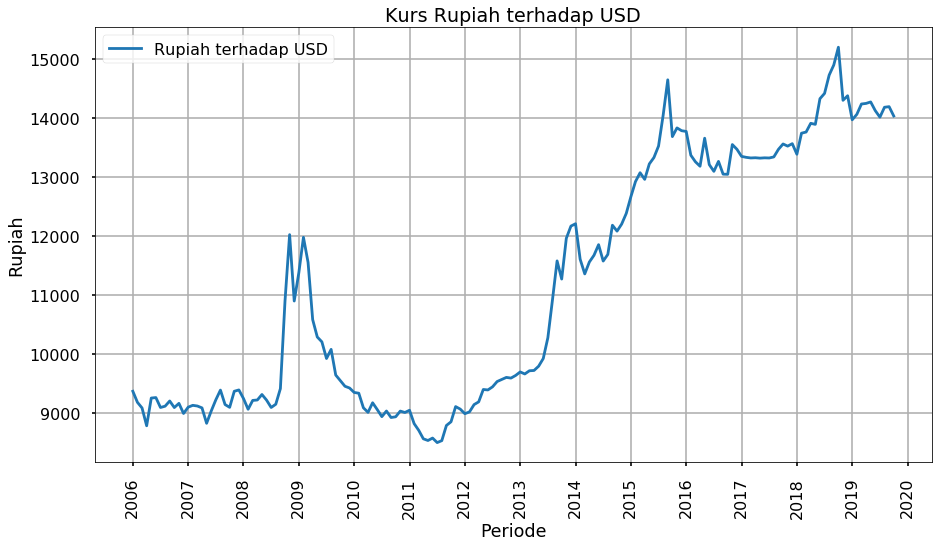

In [5]:
plt.figure(figsize=[15,8])
plt.plot(DataKurs, label="Rupiah terhadap USD")
plt.xticks(np.arange(0, 170,step=12),Tahun,rotation='vertical')
plt.grid(True)
plt.title("Kurs Rupiah terhadap USD")
plt.xlabel("Periode")
plt.ylabel("Rupiah")
plt.legend()
plt.show()

Tabel Fluktuasi kurs di samping menunjukkan perubahan nilai kurs Rupiah terhadap dolar Amerika. Terlihat bahwa banyak kenaikan yang bergerak secara signifikan, dapat dilihat dari fluktuasi pada tahun 2008 sampai 2009, persentase kenaikan dilihat dari median dalam satu tahun mencapai 9,85% dengan selisih sekitar Rp. 909,50. Selain itu pada tahun 2013 sampai 2014 pun terdapat kenaikan yang cukup signifikan yaitu sebesar 16,54% dengan selisih Rp. 1671,25 dengan setelahnya diikuti kenaikan fluktuasi yang melambung tinggi. 

## Data Indeks Harga Perdagangan Besar 

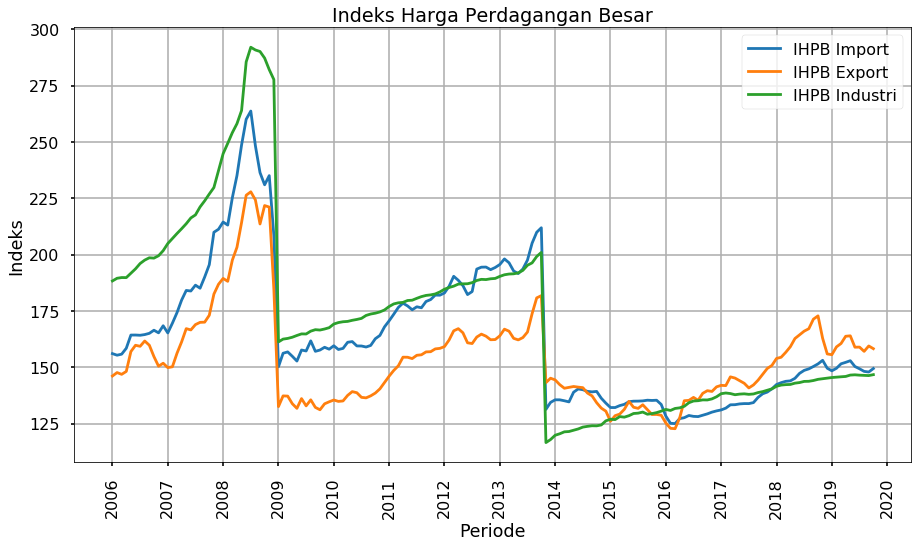

In [3]:
plt.figure(figsize=[15,8])
plt.plot(DataImport, label="IHPB Import")
plt.plot(DataExport, label="IHPB Export")
plt.plot(DataIndustri, label="IHPB Industri")
plt.xticks(np.arange(0, 170,step=12),Tahun,rotation='vertical')
plt.grid(True)
plt.title("Indeks Harga Perdagangan Besar")
plt.xlabel("Periode")
plt.ylabel("Indeks")
plt.legend()
plt.show()

Grafik di atas merupakan grafik yang menunjukkan indeks harga perdagangan besar dari tiga sektor yaitu Impor, Ekspor, dan Industri. Dari grafik, terlihat anomali yang terjadi pada transisi tahun 2008 menuju 2009, dan 2013 menuju 2014. Penurunan secara seragam sangat signifikan (anjlok) terjadi pada ketiga IHPB tersebut.  

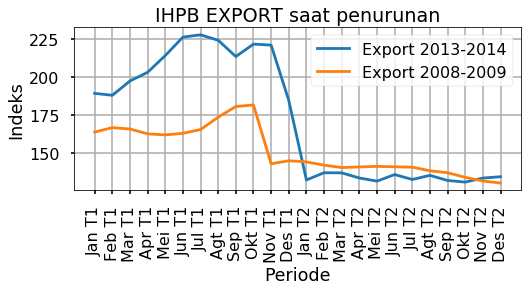

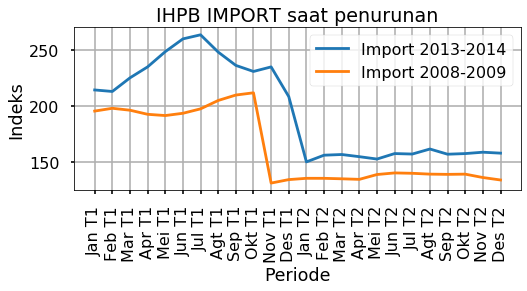

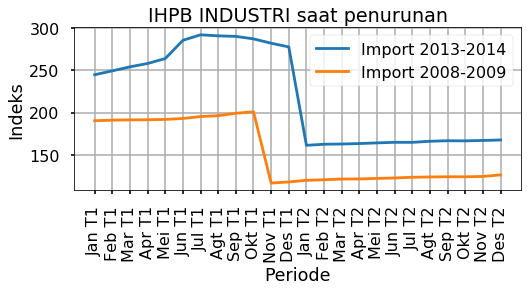

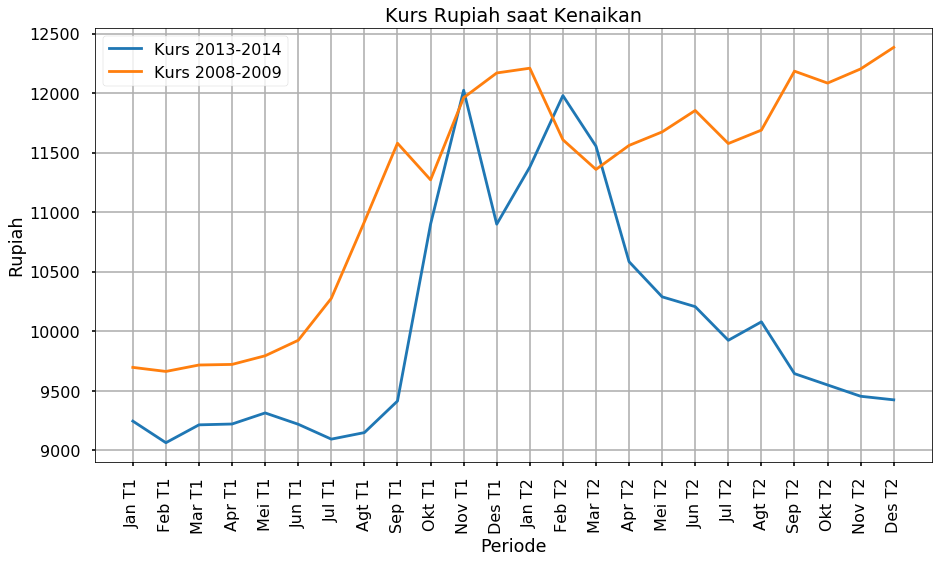

In [16]:
Bulan2Y=['Jan T1','Feb T1','Mar T1','Apr T1','Mei T1','Jun T1','Jul T1','Agt T1','Sep T1','Okt T1','Nov T1','Des T1','Jan T2','Feb T2','Mar T2','Apr T2','Mei T2','Jun T2','Jul T2','Agt T2','Sep T2','Okt T2','Nov T2','Des T2']
DEX1=DataExport[(2008-2006)*12:(2010-2006)*12]
DEX2=DataExport[(2013-2006)*12:(2015-2006)*12]
plt.figure(figsize=[8,3])
plt.plot(Bulan2Y,DEX1, label="Export 2013-2014")
plt.plot(Bulan2Y,DEX2, label="Export 2008-2009")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.title("IHPB EXPORT saat penurunan")
plt.xlabel("Periode")
plt.ylabel("Indeks")
plt.legend()
plt.show()
DIM1=DataImport[(2008-2006)*12:(2010-2006)*12]
DIM2=DataImport[(2013-2006)*12:(2015-2006)*12]
plt.figure(figsize=[8,3])
plt.plot(Bulan2Y,DIM1, label="Import 2013-2014")
plt.plot(Bulan2Y,DIM2, label="Import 2008-2009")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.title("IHPB IMPORT saat penurunan")
plt.xlabel("Periode")
plt.ylabel("Indeks")
plt.legend()
plt.show()
DIN1=DataIndustri[(2008-2006)*12:(2010-2006)*12]
DIN2=DataIndustri[(2013-2006)*12:(2015-2006)*12]
plt.figure(figsize=[8,3])
plt.plot(Bulan2Y,DIN1, label="Import 2013-2014")
plt.plot(Bulan2Y,DIN2, label="Import 2008-2009")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.title("IHPB INDUSTRI saat penurunan")
plt.xlabel("Periode")
plt.ylabel("Indeks")
plt.legend()
plt.show()
DK1=DataKurs[(2008-2006)*12:(2010-2006)*12]
DK2=DataKurs[(2013-2006)*12:(2015-2006)*12]
plt.figure(figsize=[15,8])
plt.plot(Bulan2Y,DK1, label="Kurs 2013-2014")
plt.plot(Bulan2Y,DK2, label="Kurs 2008-2009")
plt.xticks(rotation='vertical')
plt.grid(True)
plt.title("Kurs Rupiah saat Kenaikan")
plt.xlabel("Periode")
plt.ylabel("Rupiah")
plt.legend()
plt.show()

Saat diamati lebih lanjut, penurunan terjadi di sekitar bulan Oktober sampai Januari dan jika kita melihat jarak transisinya, hampir mirip dengan kenaikan signifikan yang terdapat pada fluktuasi kurs tahun 2008-2009 dan 2013-2014.
Pada tahun 2008-2009, rata-rata penurunan mencapai 33,45% dan pada tahun 2013-2014, rata-rata penurunan mencapai 30,48%.

Pada grafik perubahan kurs menunjukkan bahwa pada tahun 2008-2009 dan tahun 2013-2014, kenaikan terjadi antara bulan Juli sampai dengan Desember.  Ini menunjukkan terdapat pola tertentu pada fluktuasi kurs.
Selain itu dari tabel terlihat bahwa setelah terjadi kenaikan yang signifikan di akhir tahun 2008 dan 2013, pada tahun 2009, Kurs Rupiah turun, sementara pada tahun 2018, Kurs Rupiah Naik.

## Analisis Hubungan

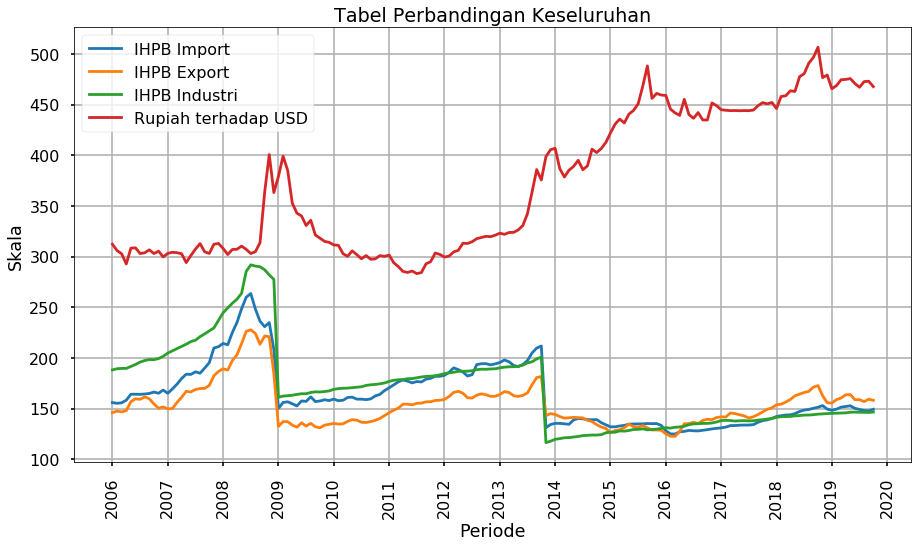

In [6]:
plt.figure(figsize=[15,8])
plt.plot(DataImport, label="IHPB Import")
plt.plot(DataExport, label="IHPB Export")
plt.plot(DataIndustri, label="IHPB Industri")
plt.plot(DataKurs/30, label="Rupiah terhadap USD")
plt.xticks(np.arange(0, 170,step=12),Tahun,rotation='vertical')
plt.grid(True)
plt.title("Tabel Perbandingan Keseluruhan")
plt.xlabel("Periode")
plt.ylabel("Skala")
plt.legend()
plt.show()

Pada tabel perbandingan keseluruhan, fluktuasi kurs terlihat sangat memengaruhi indeks harga perdagangan besar dari ketiga sektor tersebut, dan selain itu indeks tersebut pada periode saat ini lebih kecil dari sebelumnya (<2009 dan 2009-2014).
Uniknya, pada tahun-tahun tersebut merupakan akhir periode pemerintahan, karena pada tahun 2009 dan 2014 merupakan tahun-tahun pesta demokrasi yaitu pemilihan umum (presiden). Sayangnya semakin hari, nilai fluktuasi kurs semakin meningkat, tetapi indeks harga perdagangan semakin turun. Dapat disimpulkan bahwa kedua parameter ini (Kurs dan IHPB) tidak dapat dipisahkan satu sama lain karena memiliki relasi yang kuat.

In [7]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def gentahun(jump):
    TahunEx = [2006]
    for x in range(jump):
        TahunEx.append(TahunEx[x]+1)
    return TahunEx

def arimaauto(y):

    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    #Menentukan order arima untuk membentuk AIC terkecil
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    lowest=100000.0

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                if (lowest > results.aic):
                    lowest = results.aic
                    isLowest = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, lowest)
            except:
                continue
    print('LOWEST AIC = ' + isLowest)
    
def plotsarimax(y, order,so,lay,jump, train):
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=order,
                                    seasonal_order=so,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False,
                                   )

    results = mod.fit()

    print(results.summary())

    results.plot_diagnostics(figsize=(15, 12))
    plt.show()

    pred = results.get_prediction(start=(train-2006)*12,dynamic=False)
    pred_ci = pred.conf_int()
    plt.figure(figsize=(15,8))
    ax = y.plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Periode')
    ax.set_ylabel(lay)
    plt.xticks(np.arange(0, 170,step=12),Tahun,rotation='vertical')
    plt.legend()

    plt.show()

    y_forecasted = pred.predicted_mean
    y_truth = y

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

    pred_dynamic = results.get_prediction(start=(train-2006)*12, dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    ax = y.plot(label='observed', figsize=(20, 15))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Periode')
    ax.set_ylabel(lay)
    plt.xticks(np.arange(0, 170,step=12),Tahun,rotation='vertical')
    plt.legend()
    plt.show()

    # Extract the predicted and true values of our time series
    y_forecasted = pred_dynamic.predicted_mean
    y_truth = y

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

    pred_uc = results.get_forecast(steps=jump*12)

    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(20, 15))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)

    ax.set_xlabel('Periode')
    ax.set_ylabel(lay)
    plt.xticks(np.arange(0, 170+(jump*12),step=12),gentahun(2020+jump-2006),rotation='vertical')
    plt.legend()
    plt.show()

## Peramalan Menggunakan Metode ARIMA
### Kenapa ARIMA?
Arima dipakai karena data set merupakan time-series dengan data yang cukup banyak, sehingga cocok diaplikasikan training pada metode Arima sehingga didapatkan hasil yang baik.  Arima merupakan kependekan dari Auto Regressive Integrated Moving Average mempunyai tiga parameter utama yaitu P, D, Q dimana P merupakan Parameter untuk AR, D merupakan parameter dari penurunan yang dibutuhkan untuk membuat dataset menjadi stasioner. Kemudian Q merupakan Parameter untuk MA.
Dalam peramalan saat ini, digunakan ARIMA dengan orde (0,1,1) yang didapat dari fungsi AutoArima dengan memerhatikan nilai error paling kecil.

                                 Statespace Model Results                                 
Dep. Variable:                               Kurs   No. Observations:                  166
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1005.544
Date:                            Mon, 16 Dec 2019   AIC                           2017.087
Time:                                    11:39:11   BIC                           2025.891
Sample:                                         0   HQIC                          2020.665
                                            - 166                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0778      0.061      1.276      0.202      -0.042       0.197
ma.S.L12      -0.8796      0.098   

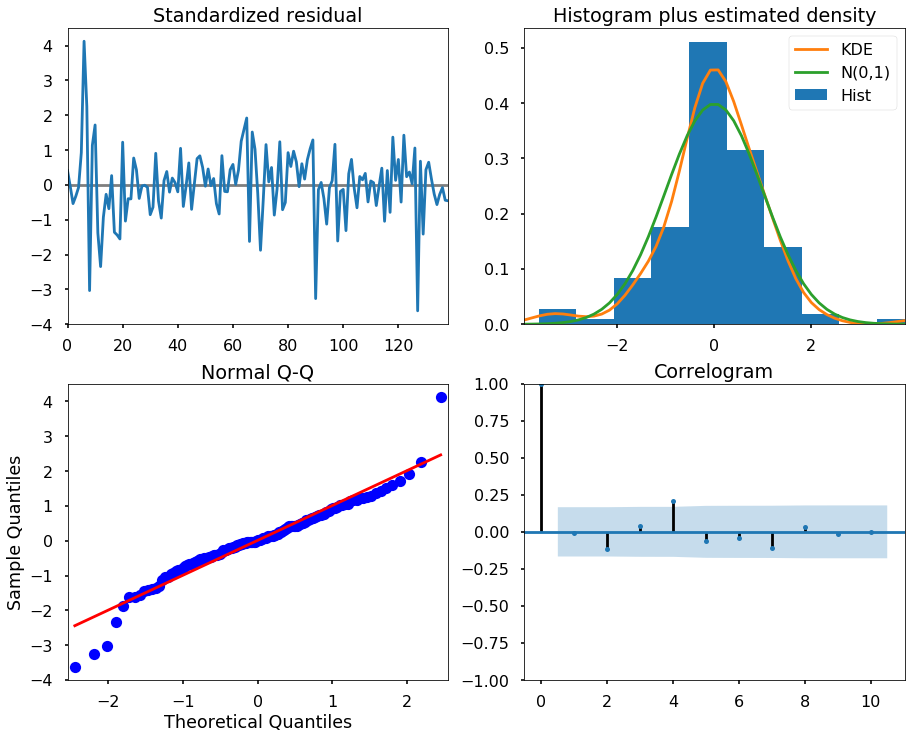

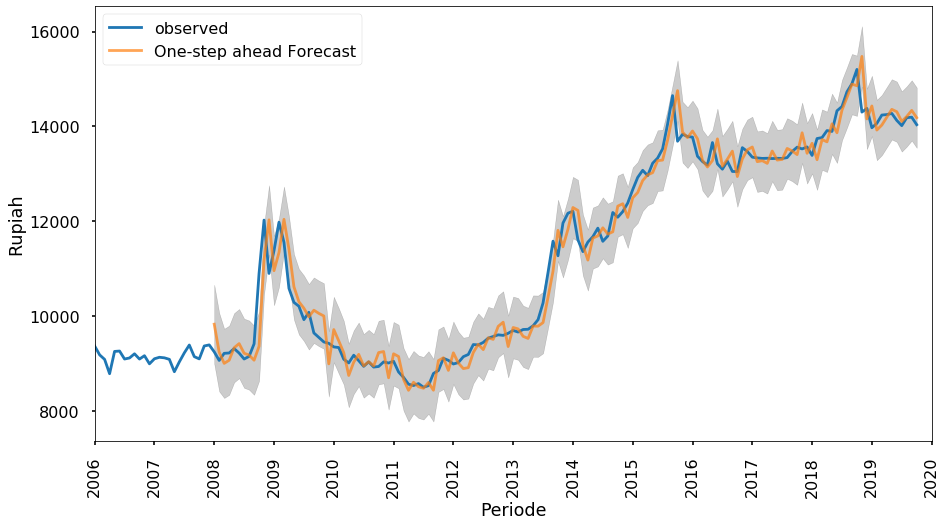

The Mean Squared Error of our forecasts is 118772.91


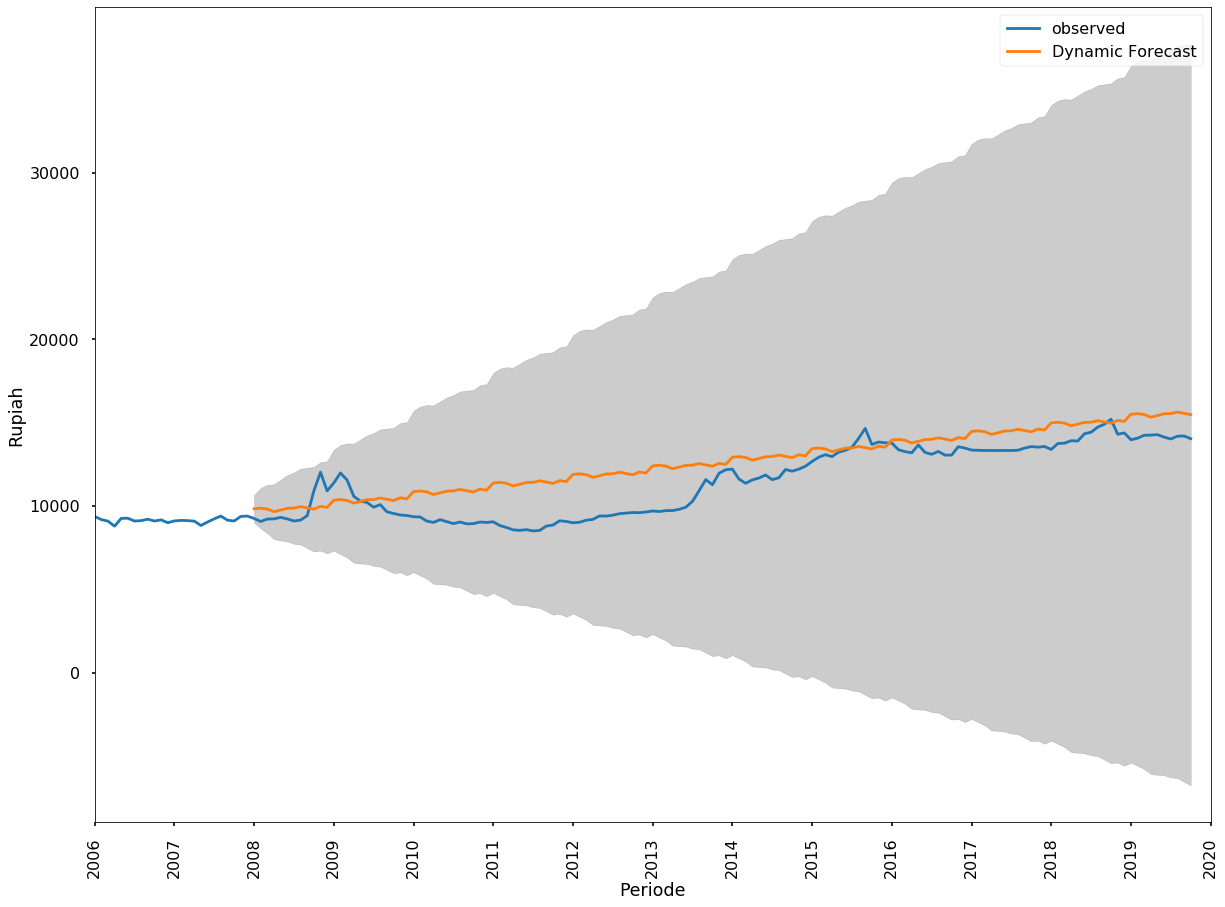

The Mean Squared Error of our forecasts is 2372496.98


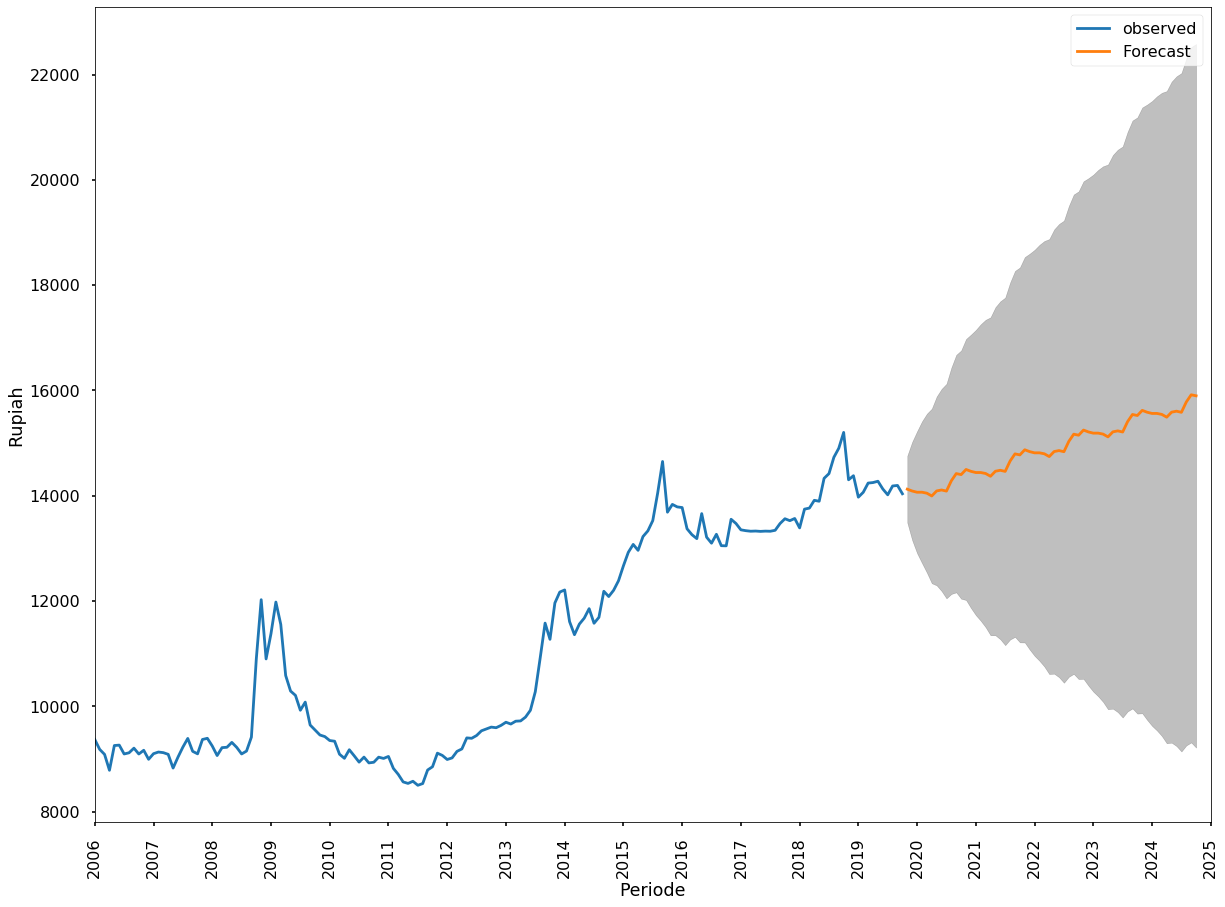

In [61]:
plotsarimax(DataKurs,(0,1,1),(0,1,1,12),'Rupiah',5,2008)

                                 Statespace Model Results                                 
Dep. Variable:                             Import   No. Observations:                  166
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -515.287
Date:                            Mon, 16 Dec 2019   AIC                           1036.574
Time:                                    11:35:26   BIC                           1045.377
Sample:                                         0   HQIC                          1040.151
                                            - 166                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1440      0.054      2.678      0.007       0.039       0.249
ma.S.L12      -1.0000   2981.333   

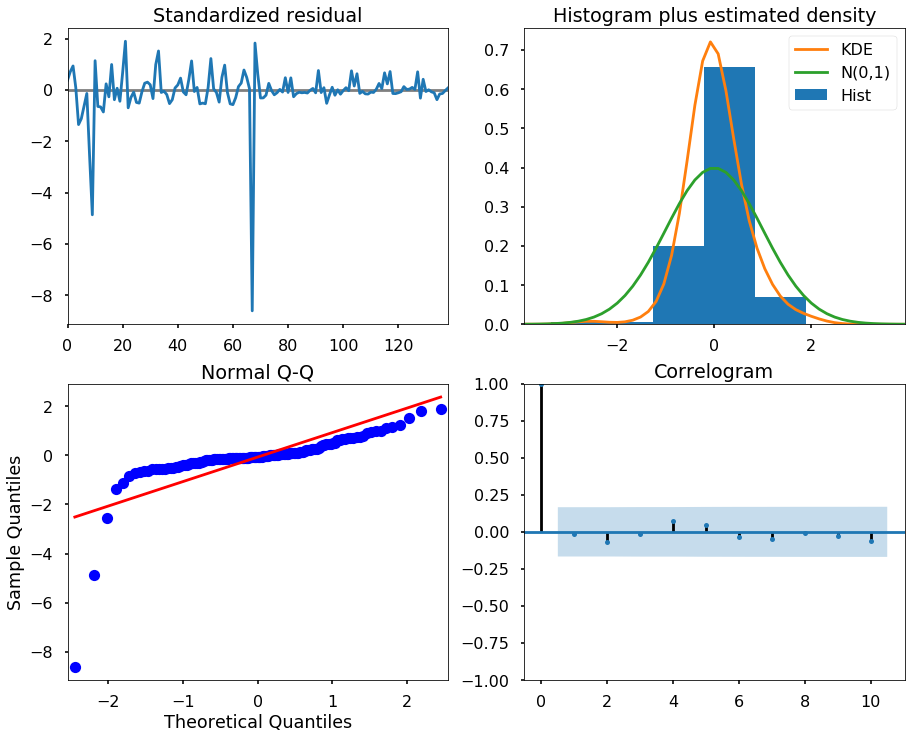

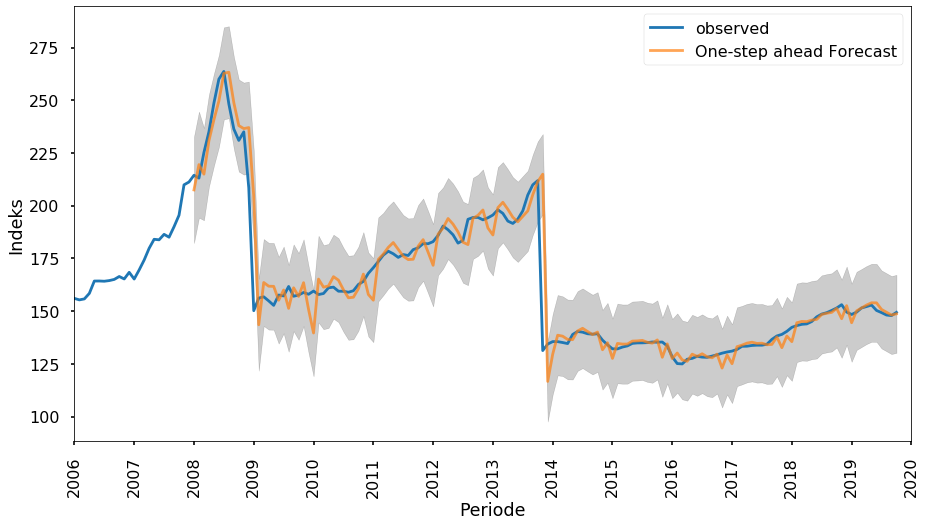

The Mean Squared Error of our forecasts is 102.42


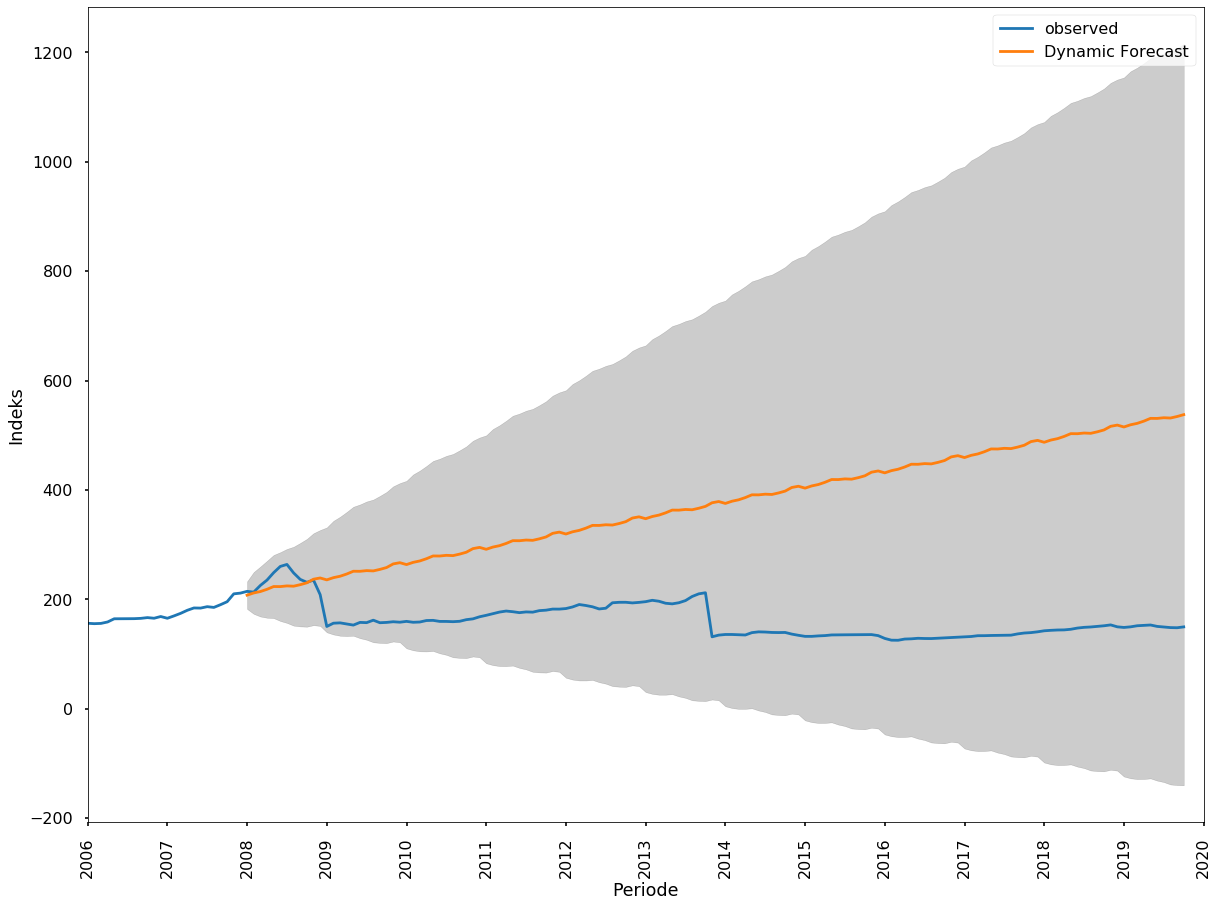

The Mean Squared Error of our forecasts is 59268.93


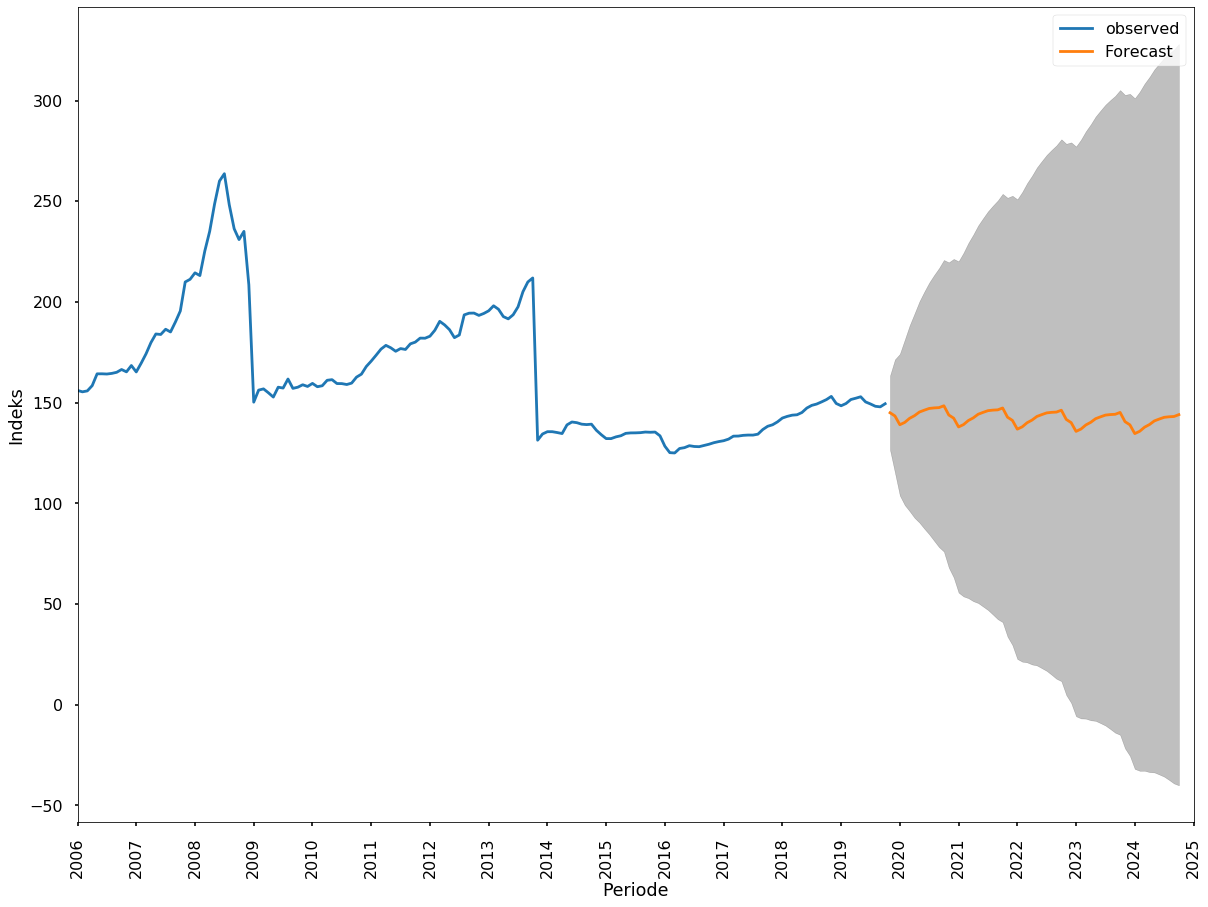

In [58]:
plotsarimax(DataImport,(0,1,1),(0,1,1,12),'Indeks',5,2008)

Dari grafik di atas, dapat kita lihat bahwa kemungkinan kurs dapat terus naik hingga tahun 2025 dapat mencapai Rp.16.000,00/USD. Hal ini mengindikasikan kita dan pemerintah perlu meningkatkan perekonomian bangsa, sehingga Indonesia dapat bersaing.

                                 Statespace Model Results                                 
Dep. Variable:                             Export   No. Observations:                  166
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -468.433
Date:                            Mon, 16 Dec 2019   AIC                            942.867
Time:                                    10:06:44   BIC                            951.670
Sample:                                         0   HQIC                           946.444
                                            - 166                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3629      0.043      8.386      0.000       0.278       0.448
ma.S.L12      -1.0000   1254.308   

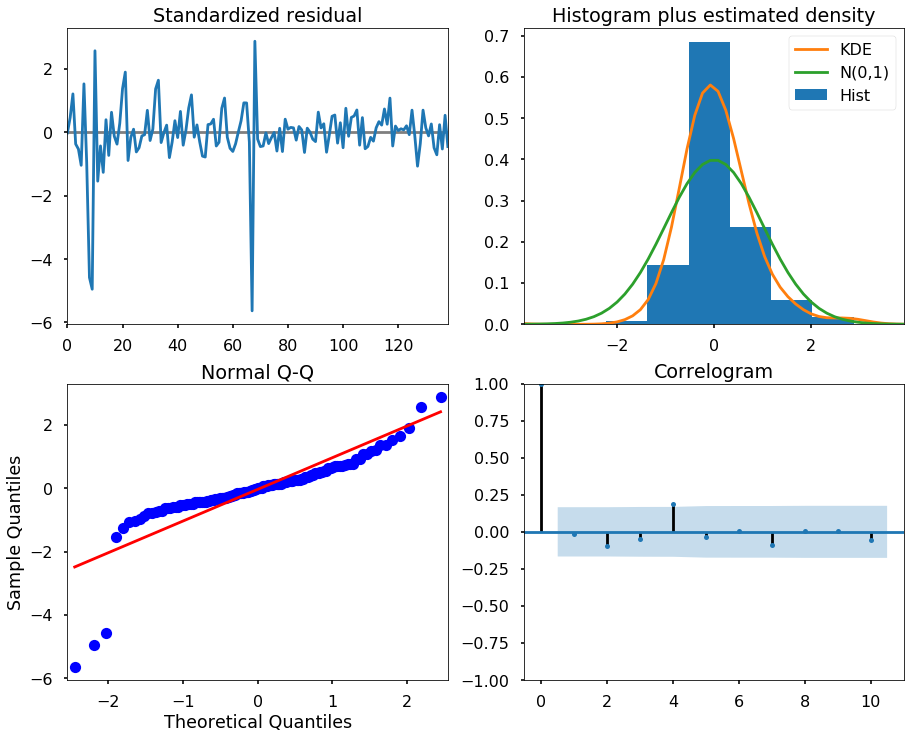

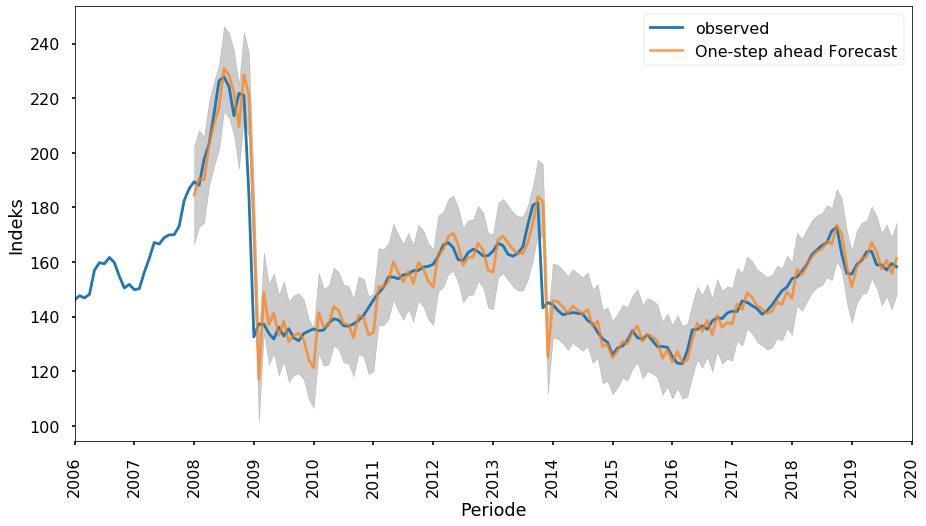

The Mean Squared Error of our forecasts is 54.59


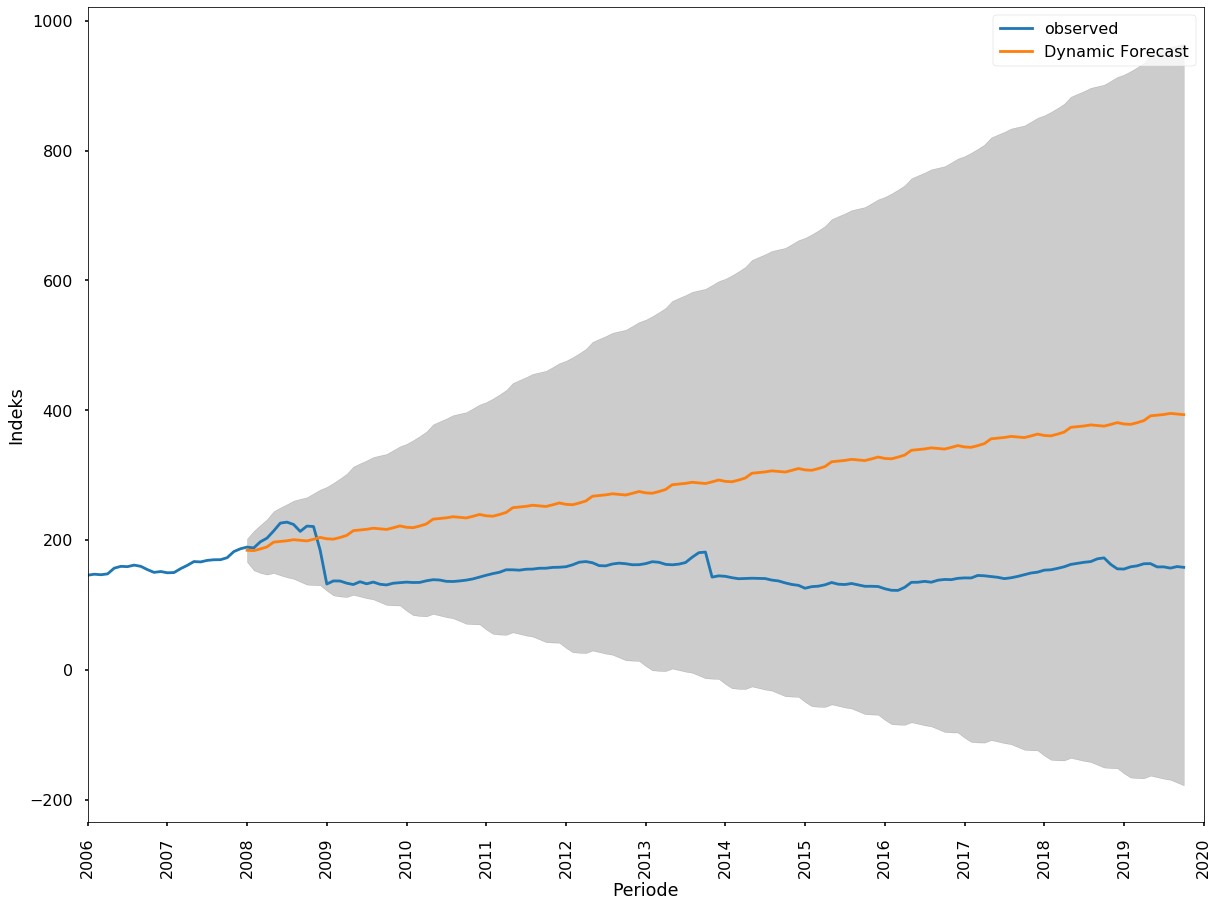

The Mean Squared Error of our forecasts is 24052.97


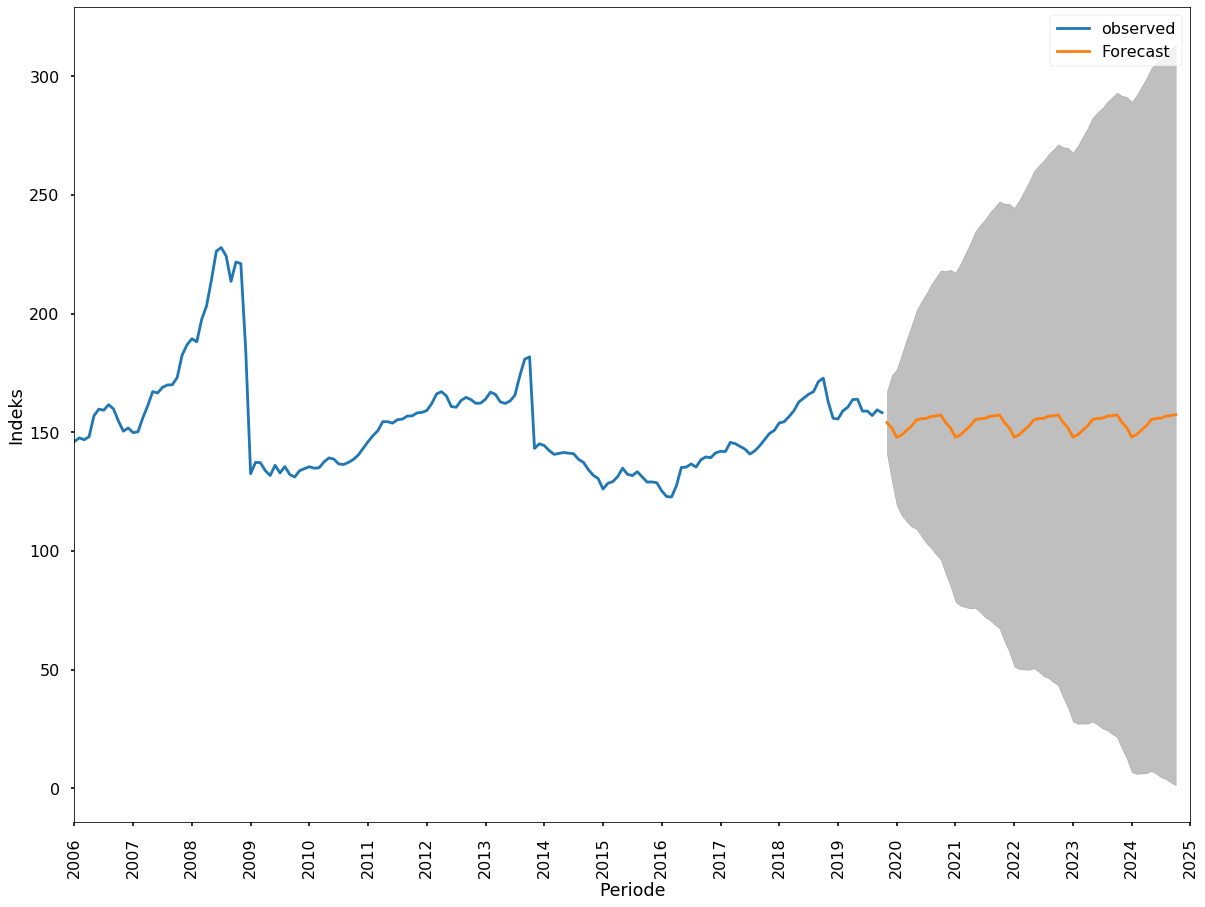

In [10]:
plotsarimax(DataExport,(0,1,1),(0,1,1,12),'Indeks',5,2008)

Grafik di atas menunjukkan prediksi IHPB untuk sektor Impor, dengan hasil yang terlihat stagnan, tetapi lebih cenderung turun.

                                 Statespace Model Results                                 
Dep. Variable:                      IHPB Industri   No. Observations:                  166
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -556.116
Date:                            Mon, 16 Dec 2019   AIC                           1120.231
Time:                                    10:06:47   BIC                           1131.969
Sample:                                         0   HQIC                          1125.001
                                            - 166                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0396      0.256      0.155      0.877      -0.463       0.542
ar.S.L12      -0.1309      0.044   

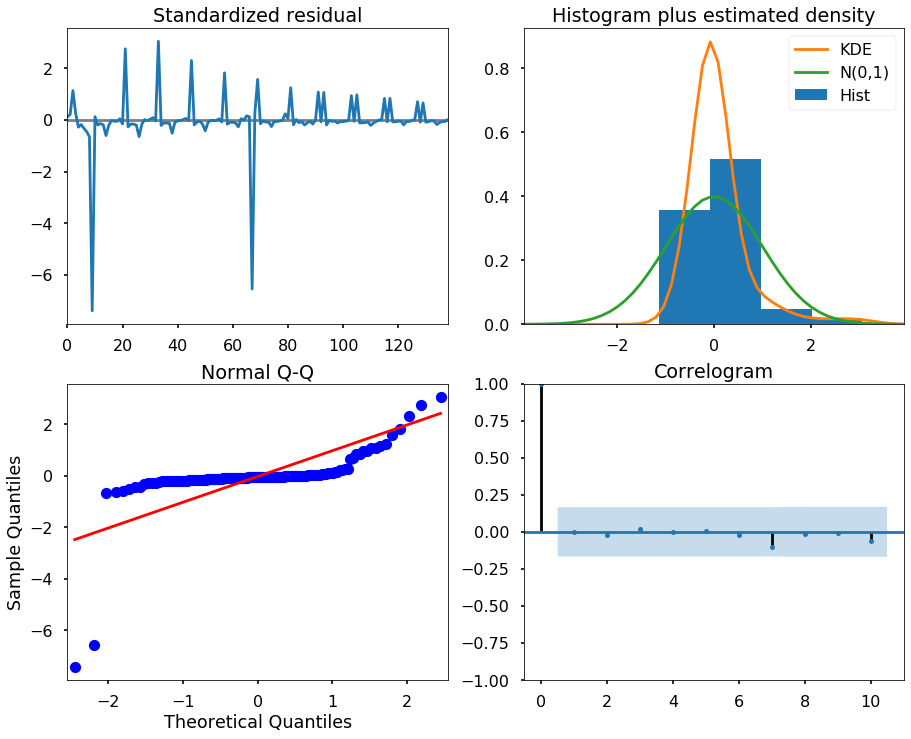

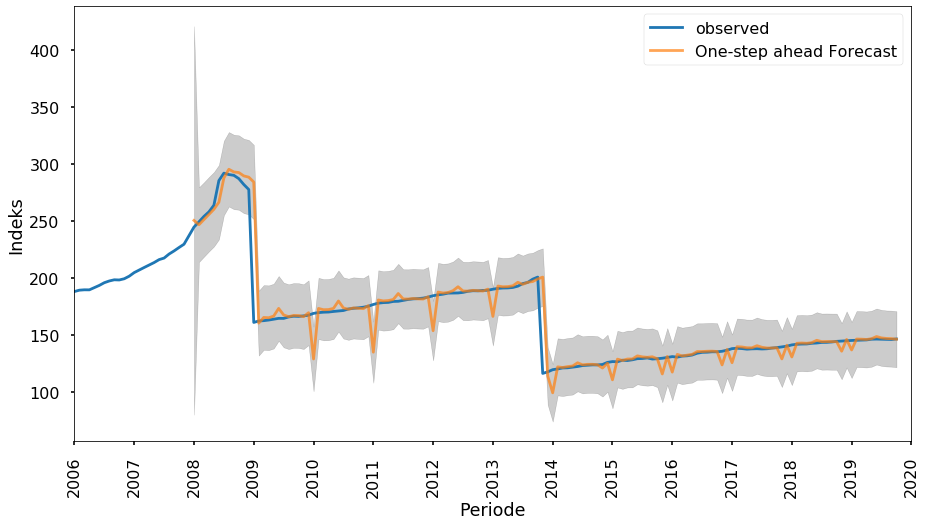

The Mean Squared Error of our forecasts is 210.8


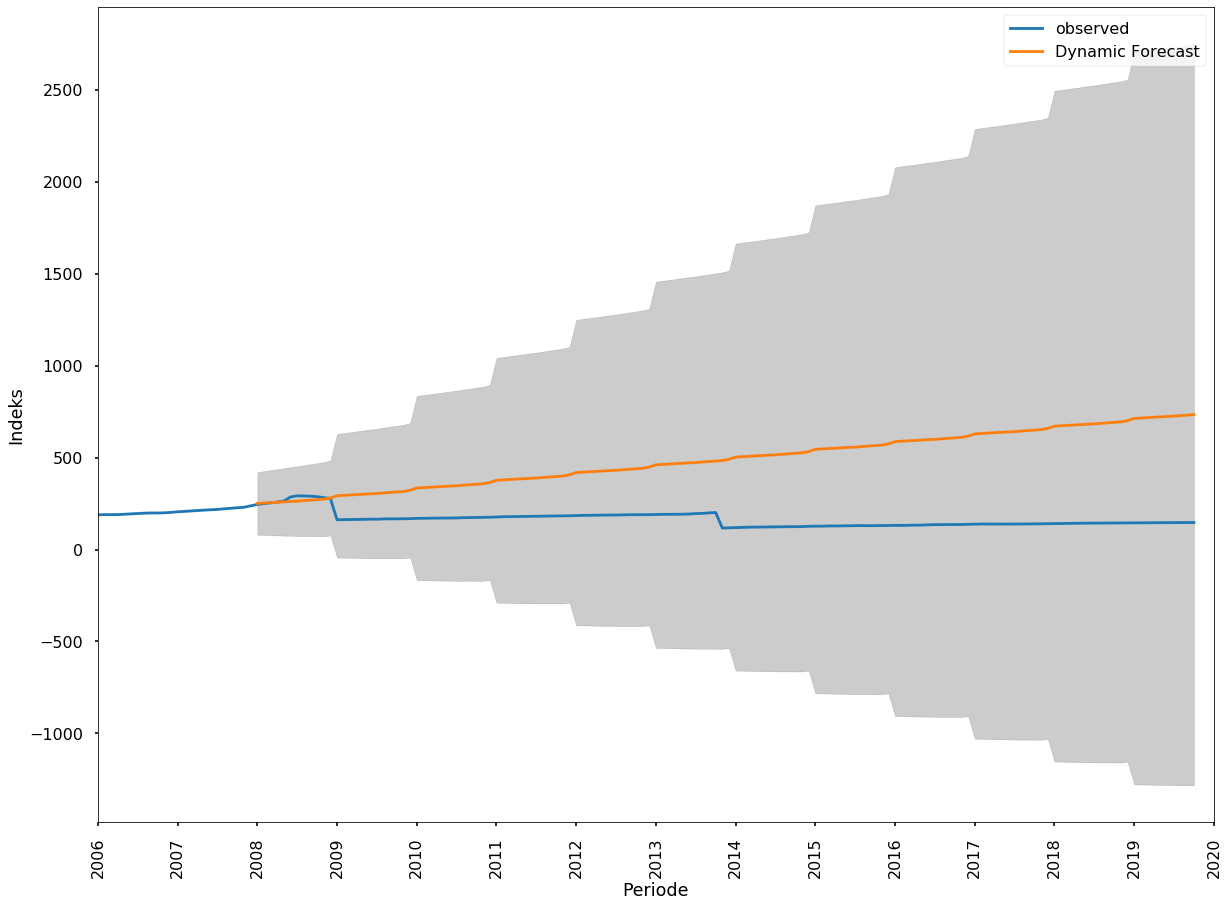

The Mean Squared Error of our forecasts is 136285.58


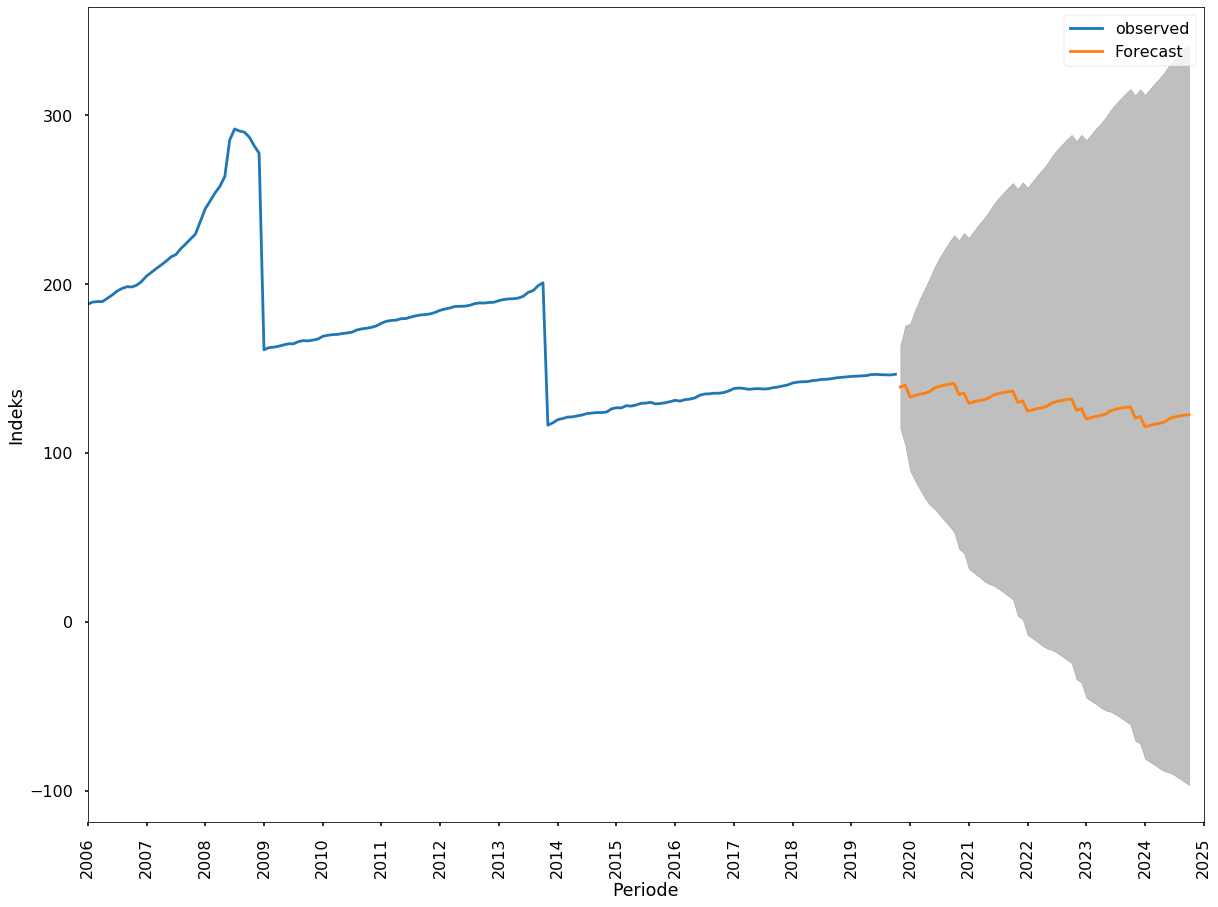

In [11]:
plotsarimax(DataIndustri,(0,1,1),(1,1,1,12),'Indeks',5,2008)

Untuk prediksi IHPB sektor Ekspor, terlihat stagnan sampai tahun 2025, hampir sama dengan IHPB sektor Impor, prediksi IHPB sektor Ekspor pun sedikit cenderung turun.


In [44]:
def descmed(data,rg):
    mdata = mymed(data)
    med8 = mdata[tahun(rg):tahun(rg)+1][0]
    med9 = mdata[tahun(rg+1):tahun(rg+1)+1][0]
    sel1 = med9 - med8
    print('Median Tahun',rg,'=',round(med8,2))
    print('Median Tahun',rg+1,'=',round(med9,2))
    print('Selisih =',round(sel1,2))
    print('Persen =',round((sel1/med8)*100,2))


In [46]:
descmed(DataKurs,2008)
descmed(DataKurs,2013)
descmed(DataImport,2008)
descmed(DataImport,2013)
descmed(DataExport,2008)
descmed(DataExport,2013)
descmed(DataIndustri,2008)
descmed(DataIndustri,2013)

Median Tahun 2008 = 9234.25
Median Tahun 2009 = 10143.75
Selisih = 909.5
Persen = 9.85
Median Tahun 2013 = 10101.25
Median Tahun 2014 = 11772.5
Selisih = 1671.25
Persen = 16.54
Median Tahun 2008 = 235.05
Median Tahun 2009 = 157.17
Selisih = -77.88
Persen = -33.13
Median Tahun 2013 = 195.99
Median Tahun 2014 = 137.62
Selisih = -58.37
Persen = -29.78
Median Tahun 2008 = 213.92
Median Tahun 2009 = 133.83
Selisih = -80.09
Persen = -37.44
Median Tahun 2013 = 164.81
Median Tahun 2014 = 140.84
Selisih = -23.97
Persen = -14.54
Median Tahun 2008 = 279.87
Median Tahun 2009 = 164.8
Selisih = -115.06
Persen = -41.11
Median Tahun 2013 = 191.69
Median Tahun 2014 = 123.06
Selisih = -68.62
Persen = -35.8


In [50]:
me1 = round((33.13+29.78+37.44)/3,2)
me2 = round((14.54+41.11+35.8)/3,2)

In [51]:
print(me1,me2)

33.45 30.48


## Kesimpulan

1. Pada akhir tahun 2008, dan 2013, terjadi kenaikan kurs rupiah terhadap dolar yang menyebabkan anjloknya Indeks Harga Perdagangan Besar yaitu pada sektor Impor, Ekspor, dan Industri
2. Kenaikan Nilai Kurs pada akhir tahun 2008 mencapai 9,85% dan menyebabkan penurunan IHPB sektor Impor sebesar 33,13%, IHPB sektor Ekspor sebesar 37,44% dan IHPB sektor Industri sebesar 41,11%
3. Kenaikan Nilai Kurs pada akhir tahun 2013 mencapai 16,54% dan menyebabkan penurunan IHPB sektor impor sebesar 29,78%, IHPB sektor Ekspor sebesar 14,54% dan IHPB sektor Industri sebesar 35,8%
4. Kenaikan Kurs dan Penurunan IHPB tidak menunjukkan nilai yang linear, tetapi kondisi kenaikan dan penurunannya bersamaan sehingga ini menunjukkan bahwa pemerintah telah berusaha keras untuk menjaga fluktuasi penurunan IHPB agar tidak menurun secara signifikan, dibuktikan dari persen penurunan pada tahun 2013 lebih kecil daripada tahun 2008. Tetapi hal ini belum menunjukkan keberhasilan pemerintah untuk meningkatkan IHPB karena nilai IHPB periode >2014 cenderung lebih kecil daripada periode sebelumnya (<2008 dan 2009-2013)
5. Hasil dari peramalan Kurs sampai dengan tahun 2025 menunjukkan kenaikan
6. Hasil dari peramalan IHPB sampai dengan tahun 2025 menunjukkan nilai stagnan untuk sektor Impor dan Ekspor, dan penurunan untuk sektor Industri
7. Proyeksi dari peramalan Kurs, dan IHPB sampai tahun 2025 menunjukkan bahwa Indonesia perlu berbenah terus menerus agar fluktuasi tidak berubah secara signifikan yang dapat merugikan segala komponen negara.